<a href="https://colab.research.google.com/github/ABChaeeun/ITB_Project/blob/main/Random%20forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random forest

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 용산구 대여소의 1-6월 이용정보 데이터
ulr = "https://raw.githubusercontent.com/ABChaeeun/ITB_Project/main/data/data.csv"
data = pd.read_csv(ulr)
data.head()

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간,연령구분
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120,0
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58,0
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570,0
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379,1
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140,1


In [ ]:
data

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간,연령구분
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120,0
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58,0
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570,0
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379,1
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22077,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344,1
22078,6,4639,4639. 동빙고근린공원,3,1,4,15,2900.89,22.47,96820.20,566,0
22079,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459,0
22080,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9,0


In [ ]:
X = data[['월', '대여소번호', '대여구분','성별', '이용건수', '운동량', '탄소량', '이동거리', '이용시간']]
y = data['연령구분']

In [ ]:
# train / test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16561, 9) (5521, 9) (16561,) (5521,)


### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators' : [10, 100], 
            'max_depth' : [6, 8, 10, 12]}
from sklearn.ensemble import RandomForestClassifier
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'max_depth': 12, 'n_estimators': 100}
Best Cross-validity Score: 0.740
Test set Score: 0.729


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

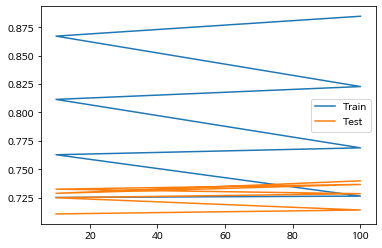

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
param_distribs = {'n_estimators': randint(low=1, high=10), 
                  'max_depth' : [6, 8, 10, 12]}

In [ ]:
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [6, 8, 10, 12],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fea2f3fde20>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'max_depth': 10, 'n_estimators': 8}
Best Cross-validity Score: 0.726
Test set Score: 0.710


In [ ]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.218727,0.028238,0.009144,0.000144,12,9,"{'max_depth': 12, 'n_estimators': 9}",0.723212,0.717391,0.726449,...,0.723145,0.003207,3,0.867527,0.862254,0.865801,0.868367,0.868820,0.866554,0.002385
1,0.021413,0.002644,0.003593,0.000377,8,1,"{'max_depth': 8, 'n_estimators': 1}",0.679445,0.677234,0.702597,...,0.690297,0.013177,7,0.711579,0.714544,0.716960,0.710016,0.720885,0.714797,0.003873
2,0.095692,0.004189,0.006180,0.000604,6,7,"{'max_depth': 6, 'n_estimators': 7}",0.706007,0.702597,0.708333,...,0.707023,0.002698,6,0.721618,0.724734,0.726696,0.723375,0.717941,0.722873,0.002974
3,0.016058,0.000783,0.003264,0.000069,6,1,"{'max_depth': 6, 'n_estimators': 1}",0.686991,0.689915,0.673611,...,0.685949,0.006965,9,0.698671,0.692505,0.686014,0.702393,0.689033,0.693723,0.006042
4,0.025460,0.001301,0.003511,0.000052,12,1,"{'max_depth': 12, 'n_estimators': 1}",0.697253,0.681159,0.673611,...,0.687216,0.009561,8,0.779438,0.779681,0.774624,0.768284,0.762020,0.772810,0.006802
5,0.157525,0.002818,0.007931,0.000667,10,8,"{'max_depth': 10, 'n_estimators': 8}",0.717477,0.720411,0.721618,...,0.723870,0.005122,2,0.807669,0.813269,0.805721,0.803457,0.807457,0.807515,0.003250
6,0.026530,0.000494,0.003945,0.000618,12,1,"{'max_depth': 12, 'n_estimators': 1}",0.678539,0.665459,0.684783,...,0.680394,0.008303,10,0.770154,0.770473,0.771756,0.779380,0.771756,0.772704,0.003401
7,0.094229,0.007454,0.006125,0.001050,12,4,"{'max_depth': 12, 'n_estimators': 4}",0.706308,0.703200,0.710145,...,0.709498,0.004951,5,0.848807,0.839082,0.841573,0.844592,0.854253,0.845662,0.005383
8,0.205773,0.031239,0.009456,0.001363,12,7,"{'max_depth': 12, 'n_estimators': 7}",0.719288,0.716787,0.721920,...,0.720428,0.004113,4,0.859450,0.860291,0.864518,0.867386,0.857801,0.861889,0.003531
9,0.369467,0.142555,0.017705,0.009205,10,8,"{'max_depth': 10, 'n_estimators': 8}",0.722306,0.722222,0.734601,...,0.726224,0.004860,1,0.809254,0.810929,0.801042,0.805042,0.808816,0.807017,0.003554


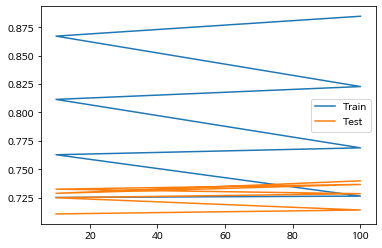

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_depth = 12, n_estimators = 6)
Forest.fit(X_train, y_train)
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.05960344 0.11418143 0.12579163 0.05070328 0.20245842 0.10381111
 0.0889831  0.1075773  0.1468903 ]


In [ ]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

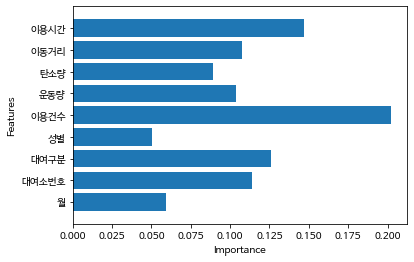

In [ ]:
def plot_feature_importances_forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_forest(Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_depth = 12, n_estimators = 6)
Forest.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

In [ ]:
pred_train=Forest.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[9712  624]
 [1908 4317]]


In [ ]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[2860  586]
 [1024 1051]]


###모델평가

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test, pred_test)

In [ ]:
print("f1_score:\n", f1)

f1_score:
 0.5662715517241379


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport = classification_report(y_test, pred_test)

In [ ]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      3446
           1       0.64      0.51      0.57      2075

    accuracy                           0.71      5521
   macro avg       0.69      0.67      0.67      5521
weighted avg       0.70      0.71      0.70      5521



In [ ]:
ulr2 = "https://raw.githubusercontent.com/ABChaeeun/ITB_Project/main/data/data_pred.csv"
data_pred = pd.read_csv(ulr2)
data_pred.head()

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간,연령구분
0,3,807,807. 서울역 12번 출구 앞,3,0,0,1,72.64,0.71,3057.37,33,0
1,1,4611,4611. 국제루터교회 앞,2,2,2,1,11.76,0.13,550.00,4,1
2,2,808,808. 서빙고동 금호맨션 앞,2,1,3,4,300.82,2.71,11686.77,134,1
3,2,847,847. 국방부민원실옆,2,1,3,3,929.02,6.85,29554.27,155,1
4,4,4612,4612. 한남 준 J.FSS 앞,2,0,3,8,549.90,4.73,20415.13,190,1


In [ ]:
data_pred =data_pred.drop(['연령구분','대여소명','연령대코드'], axis =1)

In [ ]:
data_pred_result = Forest.predict(data_pred)
data_pred_result

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [ ]:
ulr3 = "https://raw.githubusercontent.com/ABChaeeun/ITB_Project/main/data/data_pred.csv"
data_result = pd.read_csv(ulr3)
data_result

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간,연령구분
0,3,807,807. 서울역 12번 출구 앞,3,0,0,1,72.64,0.71,3057.37,33,0
1,1,4611,4611. 국제루터교회 앞,2,2,2,1,11.76,0.13,550.00,4,1
2,2,808,808. 서빙고동 금호맨션 앞,2,1,3,4,300.82,2.71,11686.77,134,1
3,2,847,847. 국방부민원실옆,2,1,3,3,929.02,6.85,29554.27,155,1
4,4,4612,4612. 한남 준 J.FSS 앞,2,0,3,8,549.90,4.73,20415.13,190,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,852,852.청암자이APT(103동),3,0,2,11,1021.39,8.86,38193.61,250,1
196,2,4622,4622. 한강중학교 앞 버스정류장,2,1,0,2,50.19,0.45,1950.00,14,0
197,5,836,836. 현대자동차서비스 앞,3,1,4,104,22747.73,161.60,696761.89,3933,0
198,1,844,844. 이촌2동 동원베네스트 아파트 앞,2,2,5,1,35.93,0.35,1512.05,15,0


In [ ]:
data_result = data_result.drop(['월',	'대여소번호',	'대여소명',	'대여구분',	'성별',	'연령대코드',	'이용건수',	'운동량',	'탄소량',	'이동거리',	'이용시간'], axis=1)
data_result

,연령구분
0,0
1,1
2,1
3,1
4,1
...,...
195,1
196,0
197,0
198,0


In [ ]:
data_pred_result = pd.DataFrame(data_pred_result)
data_pred_result

,0
0,0
1,1
2,1
3,1
4,1
...,...
195,1
196,0
197,0
198,0


In [ ]:
data_pred_result = data_pred_result.rename(columns = {0:'예측'})

In [ ]:
data_final = pd.concat([data_result, data_pred_result], axis = 1)
data_final

,연령구분,예측
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
195,1,1
196,0,0
197,0,0
198,0,0


In [ ]:
data_final['차이'] = data_final['연령구분'] - data_final['예측']
data_final

,연령구분,예측,차이
0,0,0,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
195,1,1,0
196,0,0,0
197,0,0,0
198,0,0,0


In [ ]:
len(data_final[data_final['차이']==0]) / len(data_final)

0.805